In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [18]:
base_dir = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
import os
os.listdir(base_dir)


['train', 'valid']

In [19]:
train_dir = (base_dir+ '/train')
total =0
for folder in os.listdir(train_dir):
    folder_path = os.path.join(base_dir+ '/train' ,folder)
    file_cnt =len( [file for file in os.listdir(folder_path)])
    total+=file_cnt
    print(f"Folder '{folder}' contains {file_cnt} files.")
print(f"total: {total}")

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
validation_set = tf.keras.utils.image_dataset_from_directory(
    base_dir+'/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Folder 'Orange___Haunglongbing_(Citrus_greening)' contains 2010 files.
Folder 'Potato___Late_blight' contains 1939 files.
Folder 'Peach___healthy' contains 1728 files.
Folder 'Tomato___healthy' contains 1926 files.
Folder 'Corn_(maize)___healthy' contains 1859 files.
Folder 'Grape___Black_rot' contains 1888 files.
Folder 'Tomato___Septoria_leaf_spot' contains 1745 files.
Folder 'Tomato___Tomato_mosaic_virus' contains 1790 files.
Folder 'Corn_(maize)___Common_rust_' contains 1907 files.
Folder 'Blueberry___healthy' contains 1816 files.
Folder 'Tomato___Bacterial_spot' contains 1702 files.
Folder 'Apple___Cedar_apple_rust' contains 1760 files.
Folder 'Grape___healthy' contains 1692 files.
Folder 'Peach___Bacterial_spot' contains 1838 files.
Folder 'Raspberry___healthy' contains 1781 files.
Folder 'Apple___healthy' contains 2008 files.
Folder 'Tomato___Leaf_Mold' contains 1882 files.
Folder 'Pepper,_bell___healthy' contains 1988 files.
Folder 'Tomato___Early_blight' contains 1920 files.
F

In [20]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 64ms/step - accuracy: 0.4009 - loss: 2.1353 - val_accuracy: 0.8504 - val_loss: 0.4769
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.8415 - loss: 0.5019 - val_accuracy: 0.8918 - val_loss: 0.3520
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9100 - loss: 0.2828 - val_accuracy: 0.9347 - val_loss: 0.1990
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9395 - loss: 0.1828 - val_accuracy: 0.9453 - val_loss: 0.1705
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9577 - loss: 0.1320 - val_accuracy: 0.9321 - val_loss: 0.2195
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9648 - loss: 0.1062 - val_accuracy: 0.9556 - val_loss: 0.1428
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9698 - loss: 0.0902 - val_accuracy: 0.9599 - val_loss: 0.1338
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 

In [7]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9763 - loss: 0.0714
Training accuracy: 0.9776371121406555
550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9506 - loss: 0.1620
Validation accuracy: 0.9495788812637329


In [8]:
cnn.save('trained_plant_disease_model.keras')


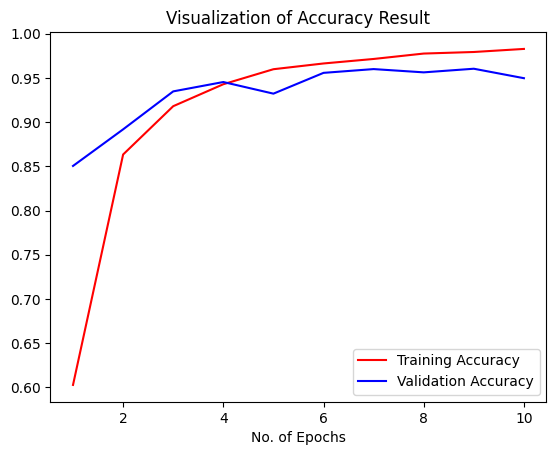

In [9]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [21]:
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    base_dir+'/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true
predicted_categories

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
print(classification_report(Y_true,predicted_categories,target_names=class_name))

Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.99      0.92       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       0.97      0.91      0.94       502
                               Blueberry___healthy       0.98      0.91      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.89      1.00      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99 

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model with imagenet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers in the base model to avoid retraining
base_model.trainable = False

# Build a new model on top of the base model
model = tf.keras.Sequential([
    base_model,  # ResNet50 as feature extractor
    GlobalAveragePooling2D(),  # Reduce the spatial dimensions
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(38, activation='softmax')  # Output layer for 38 classes
])

# Compile the model with a small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,656,294 (94.06 MB)

 Trainable params: 1,068,582 (4.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

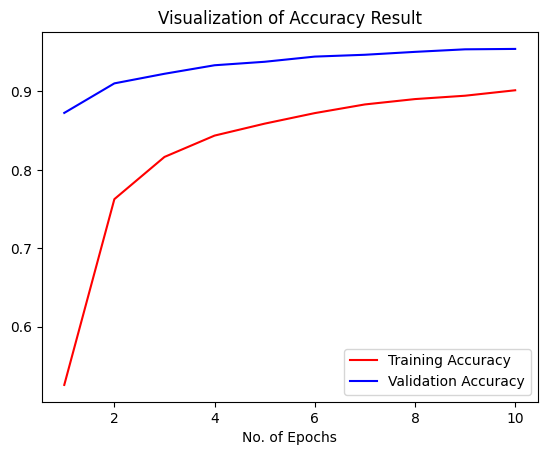

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
base_model_fine_tuned = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model_fine_tuned.trainable = True  # Unfreeze the base model layers
fine_tune_at = 20
for layer in base_model_fine_tuned.layers[:fine_tune_at]:
    layer.trainable = False  # Freeze the layers up to the fine_tune_at

fine_tuned_model = tf.keras.Sequential([
    base_model_fine_tuned,  # ResNet50 as feature extractor
    GlobalAveragePooling2D(),  # Reduce the spatial dimensions
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(38, activation='softmax')  # Output layer for 38 classes
])

fine_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_model.summary()

fine_tuned_history = fine_tuned_model.fit(x=training_set, validation_data=validation_set, epochs=10)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,656,294 (94.06 MB)

 Trainable params: 24,501,478 (93.47 MB)

 Non-trainable params: 154,816 (604.75 KB)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 342s 127ms/step - accuracy: 0.7351 - loss: 1.0470 - val_accuracy: 0.9762 - val_loss: 0.0772
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 269s 114ms/step - accuracy: 0.9675 - loss: 0.1173 - val_accuracy: 0.9796 - val_loss: 0.0751
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 257s 112ms/step - accuracy: 0.9790 - loss: 0.0740 - val_accuracy: 0.9816 - val_loss: 0.0762
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 262s 112ms/step - accuracy: 0.9832 - loss: 0.0592 - val_accuracy: 0.9886 - val_loss: 0.0449
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 266s 114ms/step - accuracy: 0.9871 - loss: 0.0447 - val_accuracy: 0.9870 - val_loss: 0.0537
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 268s 117ms/step - accuracy: 0.9894 - loss: 0.0382 - val_accuracy: 0.9821 - val_loss: 0.1182
Epoch 7/10
1570/2197 ━━━━━━━━━━━━━━━━━━━━ 1:06 106ms/step - accuracy: 0.9904 - loss: 0.0359

In [12]:
base_model_fine_tuned = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model_fine_tuned.trainable = True  # Unfreeze the base model layers
fine_tune_at = 200
for layer in base_model_fine_tuned.layers[:fine_tune_at]:
    layer.trainable = False  # Freeze the layers up to the fine_tune_at

fine_tuned_model = tf.keras.Sequential([
    base_model_fine_tuned,  # ResNet50 as feature extractor
    GlobalAveragePooling2D(),  # Reduce the spatial dimensions
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(38, activation='softmax')  # Output layer for 38 classes
])

fine_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_model.summary()

fine_tuned_history = fine_tuned_model.fit(x=training_set, validation_data=validation_set, epochs=10)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,656,294 (94.06 MB)

 Trainable params: 1,068,582 (4.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

NameError: name 'training_set' is not defined